## Map selection
<p>The code under selects the points inside the path</p>
<p>By using matplotlib we plot the points</p>

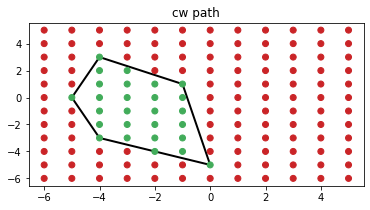

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path


polygon = [(-5,0), ( -4,3),(-1,1), (0,-5), (-4,-3),(-5,0)]

x,y = np.meshgrid(np.arange(-6,6,1),np.arange(-6,6,1))
points = list(zip(x.flatten(),y.flatten()))

path2 = matplotlib.path.Path(polygon[::-1])
inside2 = path2.contains_points(points,radius=1e-9)

fig,(ax2)=plt.subplots(ncols=1, figsize=(6,3))
patch2 = plt.Polygon(polygon[::-1], zorder=0, fill=False, lw=2)
ax2.add_patch(patch2)
ax2.scatter(x.flatten(),y.flatten(), c=inside2.astype(float),cmap="RdYlGn", vmin=-.1,vmax=1.2)
#Final
xnew = []
ynew = []
ax2.set_title("cw path")
plt.show()
new = np.array(inside2)
newin = np.array([points[i] for i in range(new.shape[0]) if new[i]])
plt.plot(newin[:,0],newin[:,1],'ro')

## K-Means
<p>From above points we are making 3 clustures using k-means clusture directly imported from Sci-Kit_Learn</p>

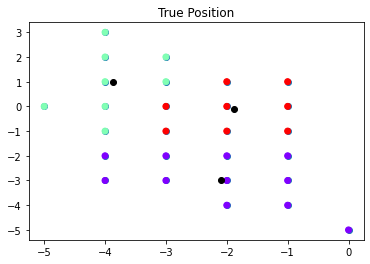

In [3]:
from sklearn.cluster import KMeans

plt.scatter(newin[:,0],newin[:,1])
plt.title('True Position')


kmeans = KMeans(n_clusters=3)
kmeans.fit(newin)

plt.scatter(newin[:,0],newin[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

## Travelling Sales Man Problem
- By using G.A we map the route with in the clusture
- first subplot of a graph represents initial path chose by algorith(random)
- Second subplot represents the optimal path algorithm found until nth generation(for below example we used 200 generations)
- Third subplot represents the decrement in distance of path for every generation.

Initial distance: 18.640986324787455
Final distance: 12.650281539872887


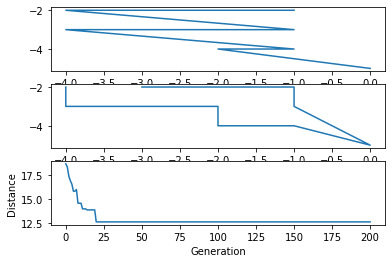

Initial distance: 11.478708664619075
Final distance: 9.65685424949238


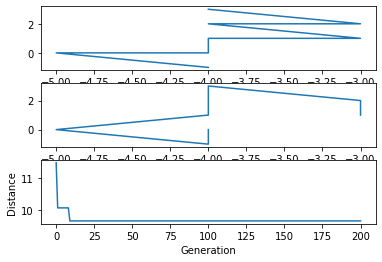

Initial distance: 10.06449510224598
Final distance: 8.0


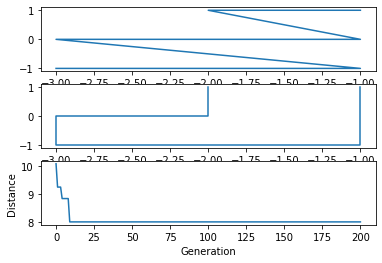

In [6]:
import tsp_ga as ga
for i in range(0,3):
    ga.geneticAlgorithm([ga.City(j[0],j[1]) for j in newin[(kmeans.labels_==i)]],100,20,0.01,200)